In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('./hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
# Q2: How many days before arrival date do customers usually cancel their booking?
#from datetime import date, strptime 
from datetime import date, datetime

month={
        'January' : 1,
        'February' : 2,
        'March' : 3,
        'April' : 4,
        'May' : 5,
        'June' : 6,
        'July' : 7,
        'August' : 8,
        'September' : 9, 
        'October' : 10,
        'November' : 11,
        'December' : 12 }
    

#Only interested in canceled bookings
can_df= df[df['is_canceled']==1] 
#Take only columns necessary to answer question
new_df= can_df[['hotel','lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month','reservation_status','reservation_status_date']]
 
new_df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status,reservation_status_date
8,Resort Hotel,85,2015,July,1,Canceled,2015-05-06
9,Resort Hotel,75,2015,July,1,Canceled,2015-04-22
10,Resort Hotel,23,2015,July,1,Canceled,2015-06-23
27,Resort Hotel,60,2015,July,1,Canceled,2015-05-11
32,Resort Hotel,96,2015,July,1,Canceled,2015-05-29


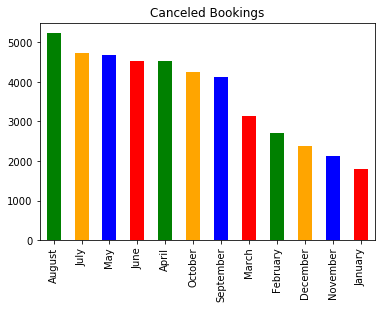

In [3]:
#To ensure there is no bias in the data, I will plot to each month the data belongs
new_df['arrival_date_month'].value_counts().plot.bar(title='Canceled Bookings',color=['g', 'orange', 'b', 'r']);

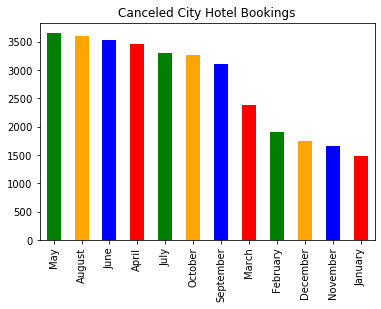

In [4]:
# Seperate to resort and city hotels
new_df[new_df['hotel']=='City Hotel']['arrival_date_month'].value_counts().plot.bar(title='Canceled City Hotel Bookings',color=['g', 'orange', 'b', 'r']);

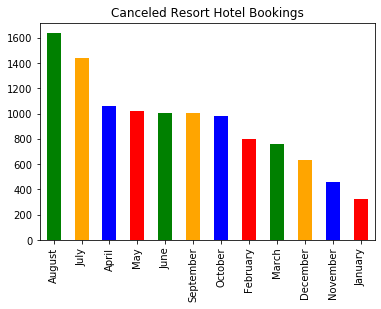

In [5]:
new_df[new_df['hotel']=='Resort Hotel']['arrival_date_month'].value_counts().plot.bar(title='Canceled Resort Hotel Bookings',color=['g', 'orange', 'b', 'r']);

In [6]:
# There  is  a bit of bias toward summer months but is should not affect the results from the data

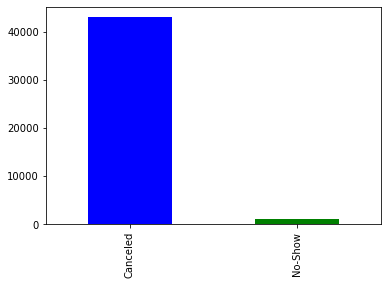

In [7]:
# bar graph showing how many rows each group has
new_df['reservation_status'].value_counts().plot.bar(color=['b', 'g']);

In [8]:
# Canceled reservations have to reservation_status states: Canceled and No-Show
# We do not care about no-shows because they do not tell us much about when they had a change of mind
# In addition, based on the plot above, one can observe no-shows are a small portion of the data
# Thus, rows with no-shows will be removed

new_df= new_df[new_df['reservation_status']=='Canceled']

new_df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,reservation_status,reservation_status_date
8,Resort Hotel,85,2015,July,1,Canceled,2015-05-06
9,Resort Hotel,75,2015,July,1,Canceled,2015-04-22
10,Resort Hotel,23,2015,July,1,Canceled,2015-06-23
27,Resort Hotel,60,2015,July,1,Canceled,2015-05-11
32,Resort Hotel,96,2015,July,1,Canceled,2015-05-29


In [9]:
arrival_date= []

for y,m,d in new_df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].values:
    
    
    arrival_date.append(date(y, month[m], d))
    


In [10]:

cancel_date_ser=new_df['reservation_status_date'].values
cancel_date=[]

for date in cancel_date_ser:
    cancel_date.append(datetime.strptime(date, '%Y-%m-%d'))
    

In [11]:
# Create an array of the durations between cancellation date and arrival date
diff=[]
for i in range(len(arrival_date)):
    diff.append((arrival_date[i]- cancel_date[i].date()).days)

In [12]:
# no longer needed
del(cancel_date)
del(arrival_date)

In [13]:
diff= pd.DataFrame(diff)
diff[0].value_counts()
# The day of arrival has the largest number of cancellations

0      881
3      718
6      636
1      630
5      603
      ... 
403      1
329      1
357      1
369      1
401      1
Name: 0, Length: 391, dtype: int64

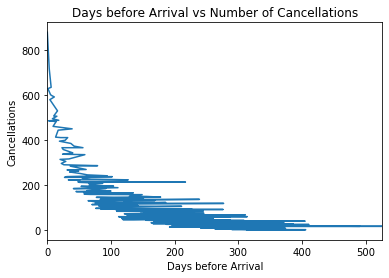

In [14]:
plt.xlabel('Days before Arrival')
plt.ylabel('Cancellations')
diff[0].value_counts().plot(title= 'Days before Arrival vs Number of Cancellations');

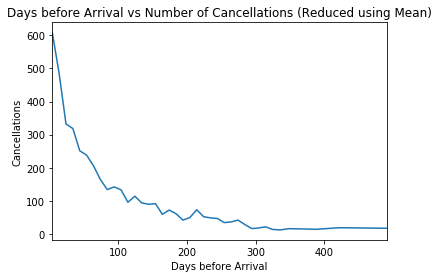

In [15]:
# Graph shows a trend but looks messy
# take an average of every 10 values to obtain a better plot
array= [(i, i+10) for i in range(0,381, 10)]
array[-1]= (380, 391)
can_mean=[]
day_mean=[]

can_std=[]
day_std=[]
for small, large in array:
    
    day_mean.append(np.mean(diff[0].value_counts().sort_index().index[small:large]))
    can_mean.append(diff[0].value_counts().sort_index()[small:large].mean())
        
    day_std.append(np.std(diff[0].value_counts().sort_index().index[small:large]))
    can_std.append(diff[0].value_counts().sort_index()[small:large].std())

plt.xlabel('Days before Arrival')
plt.ylabel('Cancellations')
pd.Series(data=can_mean, index=day_mean).plot(title= 'Days before Arrival vs Number of Cancellations (Reduced using Mean)');


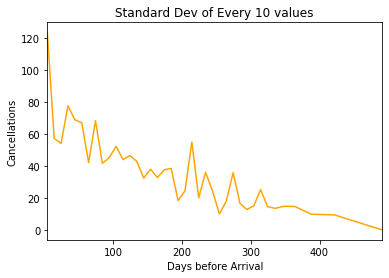

In [16]:
# Plot std among each 10 values
plt.xlabel('Days before Arrival')
plt.ylabel('Cancellations')
pd.Series(data=can_std, index=day_mean).plot(title= 'Standard Dev of Every 10 values', color='orange');

In [17]:
''' We should take lead_time into account and observe where in the period between booking and 
arrival do people decide to cancel and try to extract a pattern'''
# 1 means the customer canceled on the day of arrival
# 0 means the customer cancealed on the same day of booking
'''lead_time with val 0 will return na. Discard because it doesn't provide much information about when the customer
decided to cancel'''

((-diff[0]+new_df['lead_time'].values)/new_df['lead_time'].values).describe() # to get result as ratio of lead_time

# mean= 0.371923 lead_time 

count    42700.000000
mean         0.371923
std          0.332400
min          0.000000
25%          0.053619
50%          0.279412
75%          0.679739
max          1.000000
Name: 0, dtype: float64

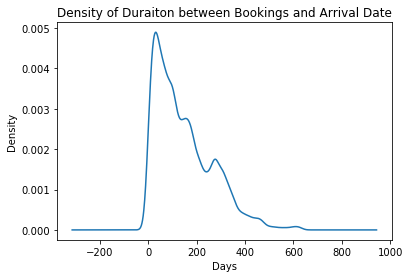

In [18]:
plt.xlabel('Days')
new_df['lead_time'].plot.density(title='Density of Duraiton between Bookings and Arrival Date');

People mostly book 100 days or less before arrival

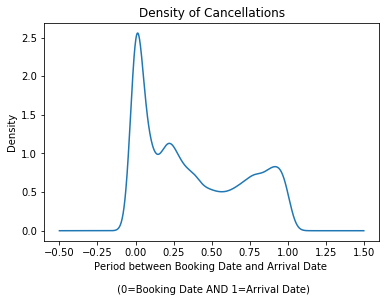

In [19]:
s_rate=(-diff[0]+new_df['lead_time'].values)/new_df['lead_time'].values


plt.xlabel('Period between Booking Date and Arrival Date \n\n (0=Booking Date AND 1=Arrival Date)')

s_rate.plot.density(title='Density of Cancellations');

In [32]:
# nearly 50% of cancellations occur in the first quarter of the period
#+ s_rate.value_counts()[s_rate.value_counts().index>=0.75].sum()
(s_rate.value_counts()[s_rate.value_counts().index<=0.25].sum())/s_rate.value_counts().sum()

0.4707025761124122

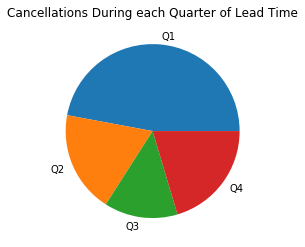

In [27]:
qs= [0, 0.25,0.50, 0.75]
perc= []
first_loop=1
for q in qs:
    if first_loop:
        percent=s_rate.value_counts()[s_rate.value_counts().index>=q]
        first_loop=0
    else:
        percent=s_rate.value_counts()[s_rate.value_counts().index>q]
    
    perc.append(percent[percent.index<=q+0.25].sum()/s_rate.value_counts().sum())
perc_pie=pd.Series(perc, index=['Q1','Q2', 'Q3', 'Q4'])

pie=perc_pie.plot(kind='pie', title='Cancellations During each Quarter of Lead Time');
pie.set_ylabel("");
pie.set_xlabel("");

In [22]:
'''As observed from the density graph above, cancellations mostly come on the DATE OF BOOKING itself and, to a lesser
extent, QUARTER WAY TO ARRIVAL DATE and on the ARRIVAL DATE. Hence, if a cancellation occurs, it will mostly occur
during these dates'''

'As observed from the density graph above, cancellations mostly come on the DATE OF BOOKING itself and, to a lesser\nextent, QUARTER WAY TO ARRIVAL DATE and on the ARRIVAL DATE. Hence, if a cancellation occurs, it will mostly occur\nduring these dates'

In [23]:
# Let's see if there is a difference in behavior between city hotel and resort hotel bookings 
hotel_df=pd.DataFrame([new_df['hotel'].values, new_df['lead_time'].values, diff[0].values], index=['hotel', 'lead_time', 'diff']).transpose()

city= hotel_df[hotel_df['hotel']=='City Hotel']
resort= hotel_df[hotel_df['hotel']=='Resort Hotel']

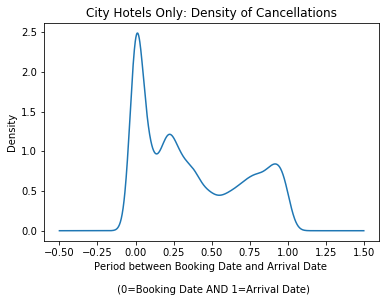

In [24]:
city_rate=(-city['diff']+city['lead_time'].values)/city['lead_time'].values
#s_rate=diff[0]/new_df['lead_time'].values

plt.xlabel('Period between Booking Date and Arrival Date \n\n (0=Booking Date AND 1=Arrival Date)')
#plt.ylabel('Density of Cancellations')
city_rate.plot.density(title='City Hotels Only: Density of Cancellations');

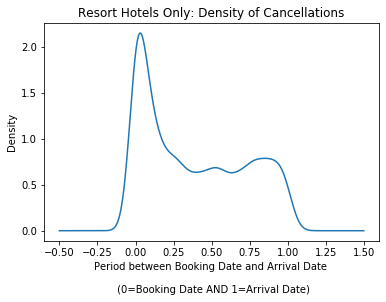

In [25]:
resort_rate=(-resort['diff']+resort['lead_time'].values)/resort['lead_time'].values


plt.xlabel('Period between Booking Date and Arrival Date \n\n (0=Booking Date AND 1=Arrival Date)')

resort_rate.plot.density(title='Resort Hotels Only: Density of Cancellations');

In [26]:
# The pattern remains the same regardless of the type of hotel except the increase in cancellations quarter way through